In [5]:
import os
import pandas as pd
from rdkit.Chem import Draw

from moldr.core.decompose import MolsMining, DefaultConfig
from moldr.chemutils import get_smiles, get_mol
from moldr.gspan.utils import gspan_to_mol

In [8]:
df = pd.read_csv("../data/zinc/all.txt", header=None)

# sample dataset
dataset = df.iloc[0:50]
dataset.head()

,0
0,CC(C)(C)c1ccc2occ(CC(=O)Nc3ccccc3F)c2c1
1,C[C@@H]1CC(Nc2cncc(-c3nncn3C)c2)C[C@@H](C)C1
2,N#Cc1ccc(-c2ccc(O[C@@H](C(=O)N3CCCC3)c3ccccc3)...
3,CCOC(=O)[C@@H]1CCCN(C(=O)c2nc(-c3ccc(C)cc3)n3c...
4,N#CC1=C(SCC(=O)Nc2cccc(Cl)c2)N=C([O-])[C@H](C#...


/home/yamada/.pyenv/versions/3.10.13/lib/python3.10/site-packages/rdkit/Chem/Draw/IPythonConsole.py:258: UserWarning: Truncating the list of molecules to be displayed to 10. Change the maxMols value to display more.
  warnings.warn(


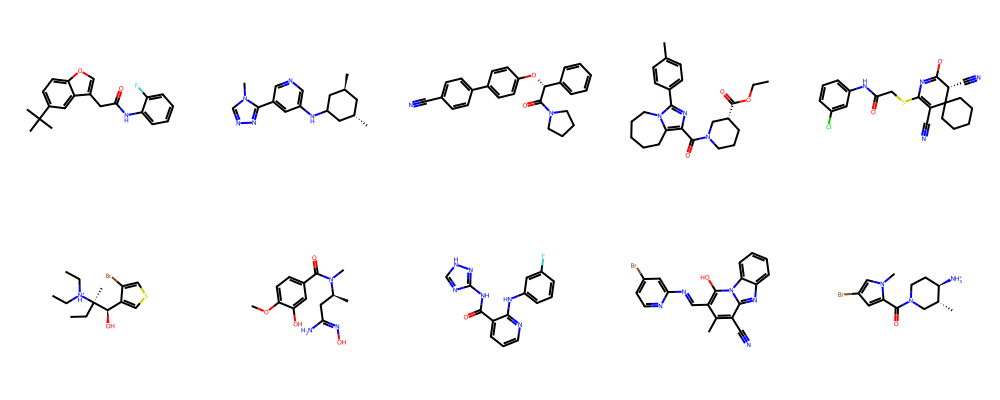

In [9]:
mols = [get_mol(s[0]) for s in dataset.values]
smiles = [get_smiles(m) for m in mols]
Draw.MolsToGridImage(mols, molsPerRow=5, maxMols=10)

In [10]:
save_dir = "data/building_blocks/zinc"
path_raw = os.path.join(save_dir, "zinc.data")
path_jt = os.path.join(save_dir, "zinc_jt.data")

In [11]:
from pathlib import Path

minsup = int(len(mols) * 0.1)
config = DefaultConfig(
    data_path=Path(path_jt), support=minsup, lower=2, upper=7, method="jt"
)
runner = MolsMining(config)
gspan = runner.decompose(mols)

  0%|          | 0/50 [00:00<?, ?it/s][10:28:49] Can't kekulize mol.  Unkekulized atoms: 13
[10:28:49] Can't kekulize mol.  Unkekulized atoms: 1 2 5 14 16
 48%|████▊     | 24/50 [00:00<00:00, 238.82it/s][10:28:49] Can't kekulize mol.  Unkekulized atoms: 5
[10:28:49] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 23
100%|██████████| 50/50 [00:00<00:00, 247.39it/s]


save to data/building_blocks/zinc/zinc_jt.data
t # 0
Read:	0.0 s
Mine:	0.16 s
Total:	0.16 s


  0%|          | 0/77 [00:00<?, ?it/s][10:28:50] Can't kekulize mol.  Unkekulized atoms: 13
[10:28:50] Can't kekulize mol.  Unkekulized atoms: 13
 49%|████▉     | 38/77 [00:00<00:00, 182.88it/s][10:28:50] Can't kekulize mol.  Unkekulized atoms: 13
[10:28:50] Can't kekulize mol.  Unkekulized atoms: 13
 75%|███████▌  | 58/77 [00:00<00:00, 187.96it/s][10:28:50] Can't kekulize mol.  Unkekulized atoms: 13
[10:28:50] Can't kekulize mol.  Unkekulized atoms: 13
100%|██████████| 77/77 [00:00<00:00, 185.44it/s]


  0%|          | 0/77 [00:00<?, ?it/s][10:28:52] Can't kekulize mol.  Unkekulized atoms: 13
[10:28:52] Can't kekulize mol.  Unkekulized atoms: 13
 48%|████▊     | 37/77 [00:00<00:00, 181.16it/s][10:28:52] Can't kekulize mol.  Unkekulized atoms: 13
[10:28:52] Can't kekulize mol.  Unkekulized atoms: 13
 74%|███████▍  | 57/77 [00:00<00:00, 187.10it/s][10:28:52] Can't kekulize mol.  Unkekulized atoms: 13
[10:28:52] Can't kekulize mol.  Unkekulized atoms: 13
100%|██████████| 77/77 [00:00<00:00, 174.82it/s]
/home/yamada/.pyenv/versions/3.10.13/lib/python3.10/site-packages/rdkit/Chem/Draw/IPythonConsole.py:258: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


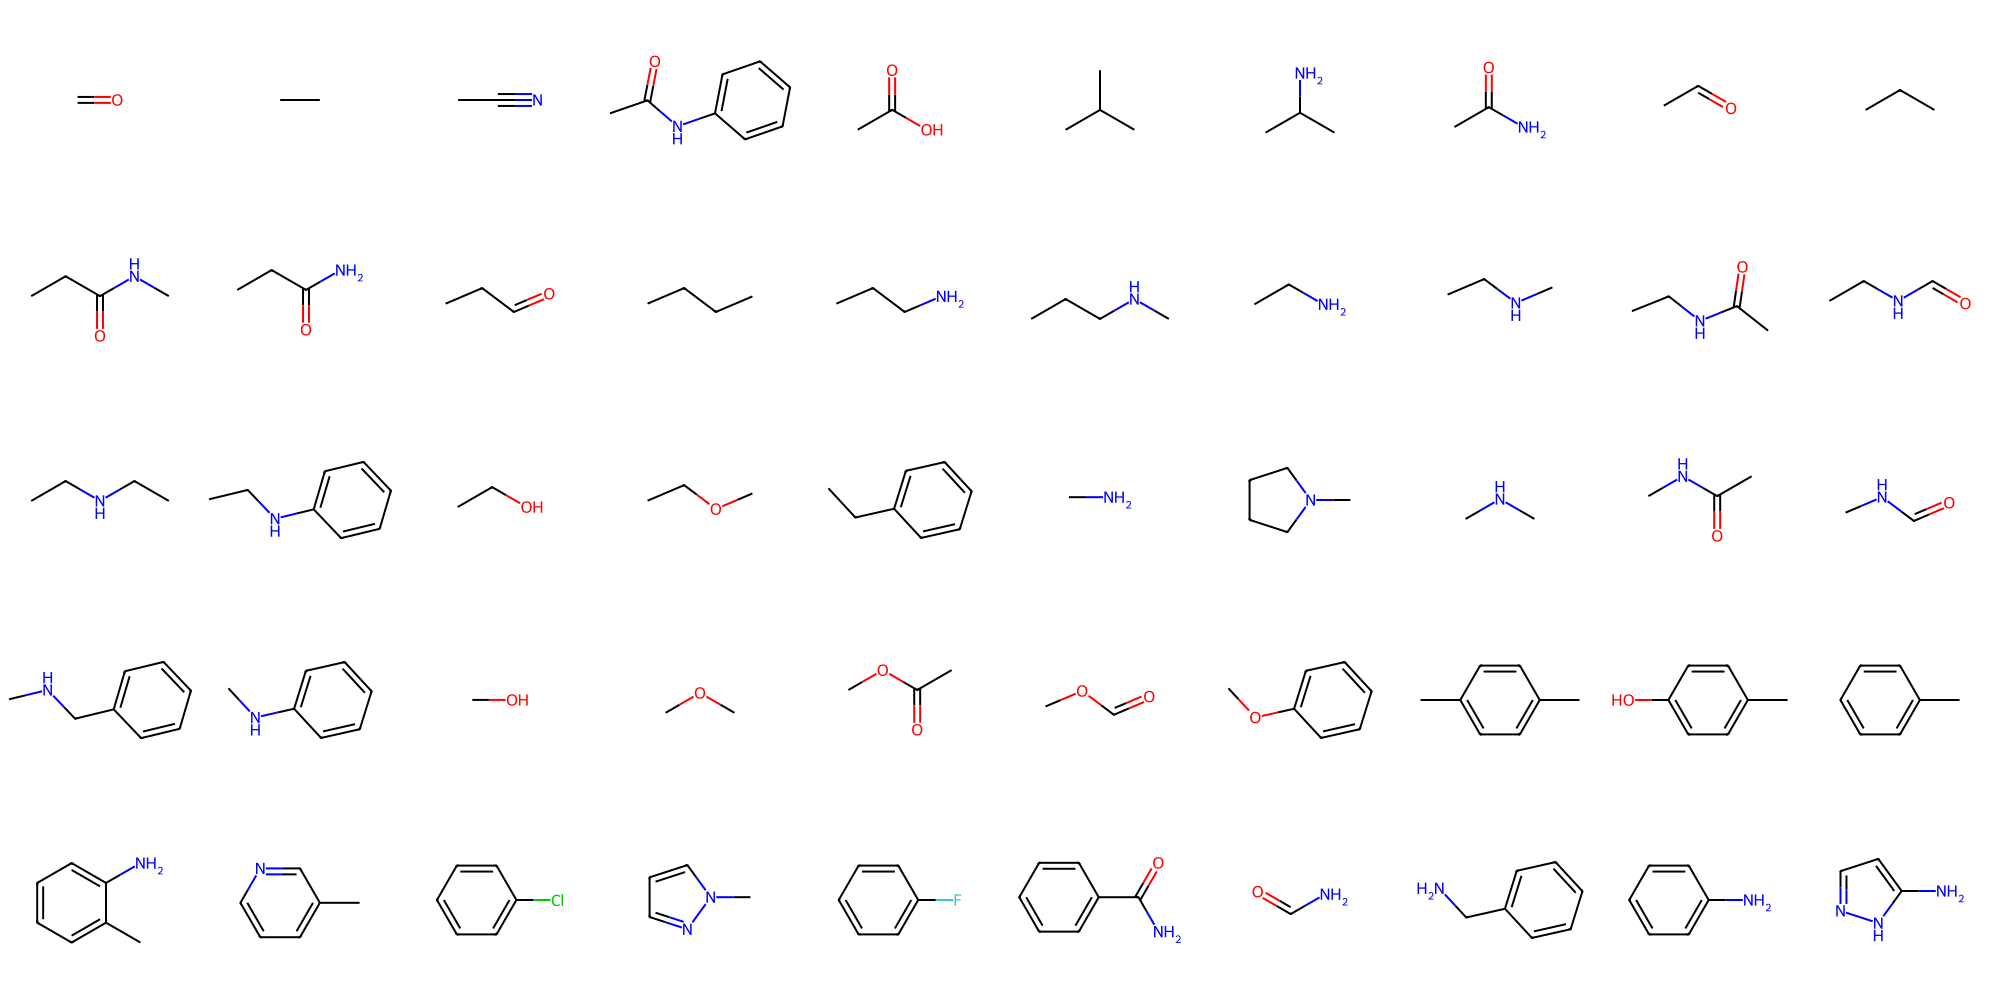

In [12]:
sub_mols = gspan_to_mol(gspan, method=config.method, smiles_list=smiles)
sub_smiles = [get_smiles(m) for m in sub_mols]
sub_mols = [get_mol(s) for s in sub_smiles]
Draw.MolsToGridImage(sub_mols, molsPerRow=10)